# Introduction to Machine Learning

## Problem Statement

#### **Background Information**

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources have been using analytics for years. However, the collection, processing, and analysis of data have been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game.



#### **Problem Statement**

Your client is a large Multinational Corporation, and they have nine broad verticals across the organization. One of the problems your client faces is identifying the right people for promotion (only for the manager position and below) and preparing them in time. Currently the process, they are following is: 



*   They first identify a set of employees based on recommendations/ past performance.
*   Selected employees go through the separate training and evaluation program for each vertical. 
*  These programs are based on the required skill of each vertical. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., the employee gets a promotion.

For the process mentioned above, the final promotions are only announced after the evaluation, and this leads to a delay in transition to their new roles. Hence, the company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around employees’ past and current performance along with demographics. Now, The task is to predict whether a potential promotee at a checkpoint will be promoted or not after the evaluation process.


## Data Exploration

In [4]:
import pandas as pd
import numpy as np


In [6]:

# Dataset URL: https://bit.ly/2ODZvLCHRDataset
# glossary URL = 'https://bit.ly/2Wz3sWcGlossary'

HR_df = pd.read_csv('https://bit.ly/2ODZvLCHRDataset')

HR_df.head(3)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [8]:
#Geting the no of rows and columns;
HR_df.shape

(54808, 14)

In [9]:
# Getting the Datatypes;
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
#Targets;
HR_df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [13]:
# Percentage of promoted vs not promoted employees;
print('1. Employees not promoted:' 
      + str(round(((HR_df["is_promoted"].isin([0]).sum())/HR_df.shape[0])*100,2)) + ' %')
print('2. Promoted employees:' 
      + str(round(((HR_df["is_promoted"].isin([1]).sum())/HR_df.shape[0])*100,2)) + ' %')

1. Employees not promoted:91.48 %
2. Promoted employees:8.52 %


##Data Preparation

In [15]:
#Striping leading and trailing spaces;
HR_df.columns = HR_df.columns.str.strip()

In [16]:
# Looking for missing data;
HR_df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
# dealing with missing data previous_year_rating column with the mean
mean_value = HR_df['previous_year_rating'].mean()
HR_df['previous_year_rating'].fillna(value=mean_value, inplace=True)

# dealing with missing education value with no education
HR_df['education'].fillna(value="No Education", inplace=True)

#check for missing records to confirm replacement
HR_df.isna().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
#perform data type conversion to fix previous year rating to int
HR_df['previous_year_rating'] = HR_df['previous_year_rating'].astype(np.int64)

#Recheck data types
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           54808 non-null  int64 
 1   department            54808 non-null  object
 2   region                54808 non-null  object
 3   education             54808 non-null  object
 4   gender                54808 non-null  object
 5   recruitment_channel   54808 non-null  object
 6   no_of_trainings       54808 non-null  int64 
 7   age                   54808 non-null  int64 
 8   previous_year_rating  54808 non-null  int64 
 9   length_of_service     54808 non-null  int64 
 10  KPIs_met >80%         54808 non-null  int64 
 11  awards_won?           54808 non-null  int64 
 12  avg_training_score    54808 non-null  int64 
 13  is_promoted           54808 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.9+ MB


In [19]:
#Dealing with duplicates;
HR_df.duplicated().sum()

0

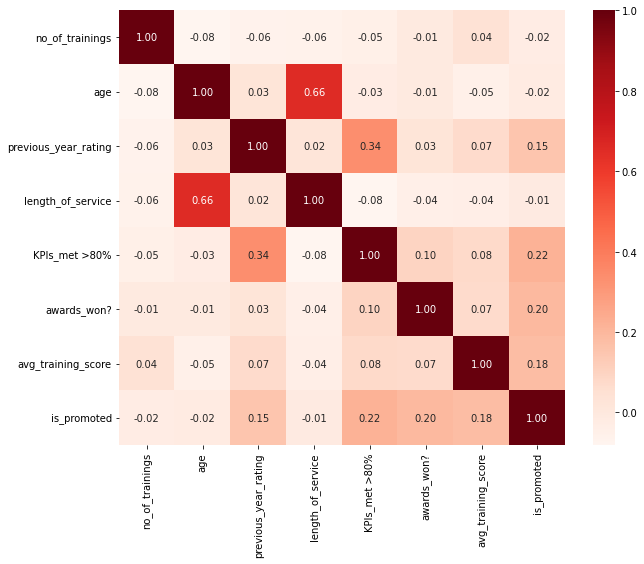

In [22]:
# check correlation of features and target

import matplotlib.pyplot as plt
import seaborn as sns

features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
corr_= HR_df[features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "Reds");

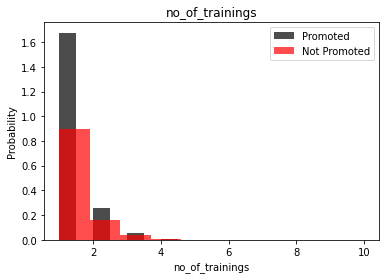

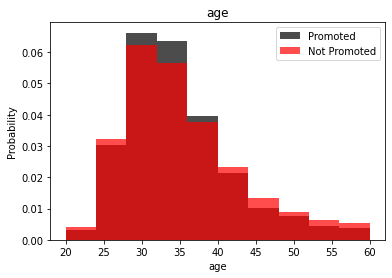

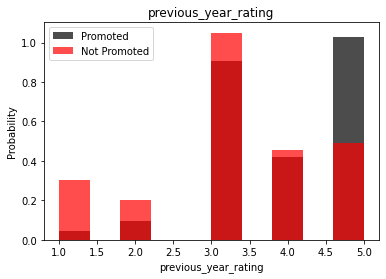

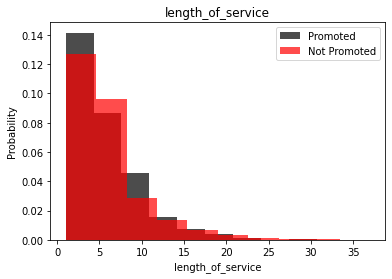

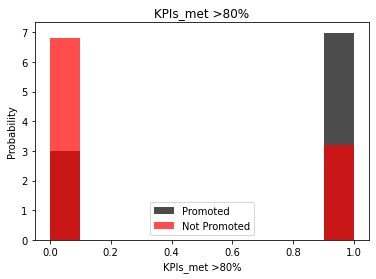

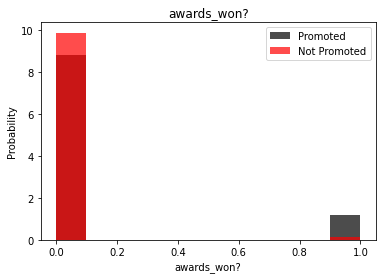

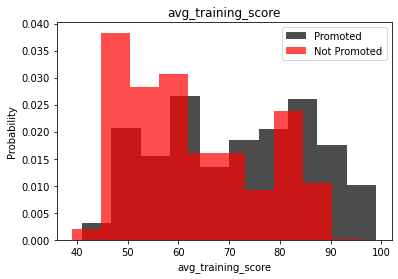

In [24]:
# plot Histogram for features to show relationship between them and target 
for feature in features[:-1]:
  plt.hist(HR_df[HR_df['is_promoted']==1][feature], color= 'black', alpha = 0.7, label = 'Promoted', density=True)
  plt.hist(HR_df[HR_df['is_promoted']==0][feature], color= 'red', alpha = 0.7, label = 'Not Promoted', density=True)
  plt.title(feature)
  plt.ylabel('Probability')
  plt.xlabel(feature)
  plt.legend()
  plt.show()


**Observation**

The KPIs_met >80% and awards won show that you are more likely to be promoted. 

##Data Modeling


In [25]:
#Defining the features and target;

#import the necessary functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


features = HR_df.drop(['education', 'recruitment_channel', 'is_promoted', 'department','region','gender'], axis=1)
target = HR_df['is_promoted']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

test_predictions = model.predict(x_test)

print('Predictions:', test_predictions)
print('Correct answers:', y_test.values)



Predictions: [0 0 0 ... 0 0 0]
Correct answers: [0 0 0 ... 0 0 0]


In [26]:
# Checking for accuracy
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test, test_predictions)  
score

0.8701879219120598

##Summary of Findings and Recommendations

The data provided was prepared (cleaned) and analysed.
Numerical data was used as the features to determine the target. 
We used histograms & heatmapsto see the relationship between the features and our target. 
We trained the model using DecisionTreeClassifier()and got an accuracy of 87% which is acceptable
The model should allow HR to predict candidates eligible for promotion with accuracy 







